In [2]:
import pandas as pd
import sqlalchemy as sa

engine = sa.create_engine("mssql+pyodbc:///?odbc_connect= DRIVER={SQL Server};SERVER=mph-eprprddwh1\DWHPRD;Trusted_Connection=yes;")

with engine.connect() as conn:
   initial_emerg_df = pd.read_sql(open("S:\Data Science\sandboxes\Jawad\patient_LOS_project\SQL_query\emergency_sql_queries\emerg_main_Los.sql").read(), con=conn.connection)

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
C:\Users\jawad.iqbal\AppData\Local\Temp\ipykernel_21760\2412318322.py:4: SyntaxWarning: invalid escape sequence '\D'
  engine = sa.create_engine("mssql+pyodbc:///?odbc_connect= DRIVER={SQL Server};SERVER=mph-eprprddwh1\DWHPRD;Trusted_Connection=yes;")
C:\Users\jawad.iqbal\AppData\Local\Temp\ipykernel_21760\2412318322.py:7: SyntaxWarning: invalid escape sequence '\D'
  initial_emerg_df = pd.read_sql(open("S:\Data Science\sandboxes\Jawad\patient_LOS_project\SQL_query\emergency_sql_queries\emerg_main_Los.sql").read(), con=conn.connection)
C:\Users\jawad.iqbal\AppData\Local\Temp\ipykernel_21760\2412318322.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider us

In [83]:
df_emerg = initial_emerg_df.copy()

In [84]:
len(df_emerg)

12906

In [85]:
df_emerg.isna().sum()

admission_datetime          0
weekend                     0
time_of_day                 0
month                       0
Los                         0
DischargeDestination        0
WardAdmission               0
acuity                    361
AdmissionMethod             0
SourceOfAdmission           0
DischargeDestination        0
EthnicCategory            762
AgeOnAdmission              0
StartSexofPatientsCode      0
PrimaryDiagnosisICD         0
Description                 0
Chapter_Number              0
Chapter_Description         0
IMD_Decile                  0
dtype: int64

In [86]:
df_emerg = df_emerg.dropna() #Droping the nulls

In [87]:
df_emerg.head(5)

,admission_datetime,weekend,time_of_day,month,Los,DischargeDestination,WardAdmission,acuity,AdmissionMethod,SourceOfAdmission,DischargeDestination,EthnicCategory,AgeOnAdmission,StartSexofPatientsCode,PrimaryDiagnosisICD,Description,Chapter_Number,Chapter_Description,IMD_Decile
0,2020-01-01 03:47:07.987,0,Midnight,1,7,51,Coronary Care Unit,1.0,21,19,51,Z,34,1,I499,"Cardiac arrhythmia, unspecified",9,Diseases of the circulatory system,4.0
3,2020-01-02 17:49:34.623,0,Afternoon,1,11,19,Acute Medical Unit,2.0,21,19,19,A,87,1,I442,"Atrioventricular block, complete",9,Diseases of the circulatory system,9.0
4,2020-01-04 09:55:25.353,0,Morning,1,10,19,Acute Medical Unit,3.0,21,19,19,A,40,1,I420,Dilated cardiomyopathy,9,Diseases of the circulatory system,6.0
5,2020-01-04 19:22:32.353,0,Evening,1,2,19,Acute Medical Unit,1.0,21,19,19,A,30,2,R002,Palpitations,18,"Symptoms, signs and abnormal clinical and labo...",3.0
6,2020-01-06 16:25:00.000,1,Afternoon,1,23,19,Acute Medical Unit,2.0,21,19,19,A,70,1,I495,Sick sinus syndrome,9,Diseases of the circulatory system,5.0


In [88]:
df_emerg_unique = df_emerg.drop_duplicates(subset=['admission_datetime', 'Los', 'AgeOnAdmission']) 

In [36]:
len(df_emerg_unique)

6181

<Axes: xlabel='Los', ylabel='Count'>

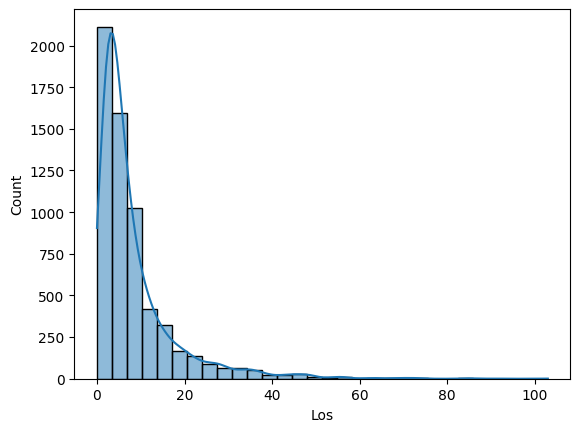

In [37]:
import seaborn as sns
sns.histplot(df_emerg_unique['Los'], bins=30, kde=True)


In [38]:
import plotly.express as px

# Define bins and labels
bins = [0, 1, 2, 5, 10, 20, 30, 40, 60, 80, float('inf')]
labels = ['0-1', '1-2', '2-5', '5-10', '10-20', '20-30', '30-40', '40-60', '60-80', '>80']

# Apply binning
df_emerg['Los_Bin'] = pd.cut(df_emerg_unique['Los'], bins=bins, labels=labels, right=False)

# Count patients per bin
bin_counts = df_emerg_unique['Los_Bin'].value_counts().sort_index()


fig1 = px.bar(
    x=bin_counts.index,
    y=bin_counts.values,
    labels={'x': 'Length of Stay (Days)', 'y': 'Number of Patients'},
    title='Distribution of Length of Stay (LoS) Bins - Emergency Admissions'
)

fig1.show()


In [117]:
# Extract month from datetime
df_emerg_unique['year_month'] = df_emerg_unique['admission_datetime'].dt.strftime('%Y-%m') # A dummy column to show year and month combined

# Group by month and calculate average LOS
monthly_avg_los = df_emerg_unique.groupby('year_month')['Los'].mean().reset_index()
monthly_avg_los1 = df_emerg_unique.groupby('year_month')['Los'].median().reset_index()

C:\Users\jawad.iqbal\AppData\Local\Temp\ipykernel_21760\878816682.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [118]:
import pandas as pd
import plotly.graph_objects as go


# Create the plot
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=monthly_avg_los['year_month'],
        y=monthly_avg_los['Los'],
        mode='lines+markers',
        name='Average LOS mean',
        line=go.scatter.Line(shape='spline')
    )
)
fig.add_trace(
    go.Scatter(
        x=monthly_avg_los1['year_month'],
        y=monthly_avg_los1['Los'],
        mode='lines+markers',
        name='Average LOS median',
        line=go.scatter.Line(shape='spline')
    )
)


# Update layout
fig.update_layout(
    title='Average LOS Per Month (2020–2024) - Emergency',
    xaxis_title='Month',
    yaxis_title='Length of Stay (Days)',
    template='plotly_white',
    margin=dict(l=20, r=20, t=40, b=40),
    xaxis=dict(tickangle=50)
)

fig.show()


In [119]:
df_emerg_unique[df_emerg_unique['year_month'] == '2023-01'][df_emerg_unique['Los'] > 30]

C:\Users\jawad.iqbal\AppData\Local\Temp\ipykernel_21760\1410697796.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,admission_datetime,weekend,time_of_day,month,Los,DischargeDestination,WardAdmission,acuity,AdmissionMethod,SourceOfAdmission,DischargeDestination,EthnicCategory,AgeOnAdmission,StartSexofPatientsCode,PrimaryDiagnosisICD,Description,Chapter_Number,Chapter_Description,IMD_Decile,year_month
4969,2023-01-05 04:07:27.410,0,Midnight,1,49,19,Coronary Care Unit,3.0,21,19,19,A,63,1,I080,Disorders of both mitral and aortic valves,9,Diseases of the circulatory system,2.0,2023-01
4971,2023-01-09 02:13:09.977,1,Midnight,1,62,51,Acute Medical Unit,3.0,21,19,51,A,72,1,R268,Other and unspecified abnormalities of gait an...,18,"Symptoms, signs and abnormal clinical and labo...",4.0,2023-01
5680,2023-01-04 05:24:05.630,0,Midnight,1,44,19,Acute Medical Unit,2.0,21,19,19,Z,65,1,I500,Congestive heart failure,9,Diseases of the circulatory system,4.0,2023-01
5798,2023-01-27 16:34:15.113,0,Afternoon,1,35,51,Fielding Ward,2.0,21,19,51,A,87,1,I083,"Combined disorders of mitral, aortic and tricu...",9,Diseases of the circulatory system,5.0,2023-01
10233,2023-01-23 20:37:40.637,1,Evening,1,33,51,Acute Medical Unit,3.0,22,19,51,A,65,2,I500,Congestive heart failure,9,Diseases of the circulatory system,6.0,2023-01
10240,2023-01-31 10:14:58.987,0,Morning,1,39,19,Acute Medical Unit,4.0,2D,19,19,A,55,1,I080,Disorders of both mitral and aortic valves,9,Diseases of the circulatory system,9.0,2023-01
12044,2023-01-17 01:45:29.370,0,Midnight,1,36,19,Acute Medical Unit,2.0,21,19,19,Z,79,2,I213,Acute transmural myocardial infarction of unsp...,9,Diseases of the circulatory system,6.0,2023-01


<Axes: ylabel='Frequency'>

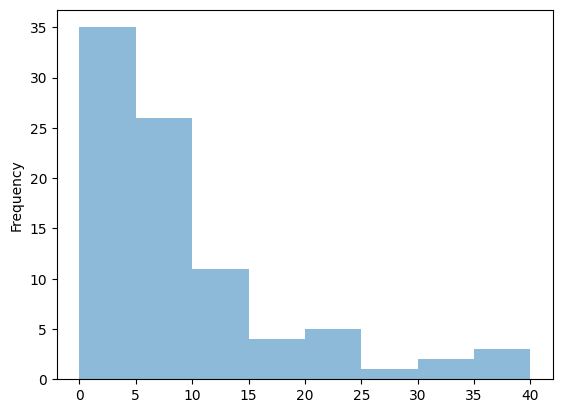

In [120]:
bins = [*range(0, 45, 5)]
#df_emerg.query("year_month == '2023-08'")['Los'].plot.hist(alpha=0.5, bins=bins)
df_emerg_unique[df_emerg_unique['year_month'] == '2023-01']['Los'].plot.hist(alpha=0.5, bins=bins)




In [121]:
monthly_avg_acuity = df_emerg_unique.groupby(['year_month', 'acuity'])['Los'].mean().reset_index()

In [122]:
import plotly.graph_objects as go

methods = monthly_avg_acuity['acuity'].unique()

# Create a trace for each method
traces = [
    go.Scatter(
        x=monthly_avg_acuity[monthly_avg_acuity['acuity'] == method]['year_month'],
        y=monthly_avg_acuity[monthly_avg_acuity['acuity'] == method]['Los'],
        mode='lines+markers',
        name=str(method),
        line=go.scatter.Line(shape='spline')
    )
    for method in methods
]

# Assemble the figure
fig = go.Figure(data=traces)
fig.update_layout(
    title='Average LOS by Time of the Day Per Month',
    xaxis_title='Month',
    yaxis_title='Length of Stay (Days)',
    template='plotly_white',
    legend_title='Acuity',
    margin=dict(l=40, r=20, t=40, b=40)
)

fig.show()


In [54]:
df_emerg_unique[df_emerg_unique['year_month'] == '2024-06'][df_emerg_unique['acuity'] == 5]

C:\Users\jawad.iqbal\AppData\Local\Temp\ipykernel_21760\892886659.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,index,admission_datetime,weekend,time_of_day,month,Los,DischargeDestination,WardAdmission,acuity,AdmissionMethod,...,EthnicCategory,AgeOnAdmission,StartSexofPatientsCode,PrimaryDiagnosisICD,Description,Chapter_Number,Chapter_Description,IMD_Decile,Los_Bin,year_month
6929,7556,2024-06-30 22:28:16.163,1,Evening,6,36,19,AMU-Barrington,5.0,21,...,A,83,1,I214,Acute subendocardial myocardial infarction,9,Diseases of the circulatory system,8.0,30-40,2024-06


In [56]:
import plotly.graph_objects as go

monthly_avg_week_weekend = df_emerg_unique.groupby(['year_month', 'weekend'])['Los'].mean().reset_index()

methods = monthly_avg_week_weekend['weekend'].unique()

# Create a trace for each method
traces = [
    go.Scatter(
        x=monthly_avg_week_weekend[monthly_avg_week_weekend['weekend'] == method]['year_month'],
        y=monthly_avg_week_weekend[monthly_avg_week_weekend['weekend'] == method]['Los'],
        mode='lines+markers',
        name=str(method),
        line=go.scatter.Line(shape='spline')
    )
    for method in methods
]

# Assemble the figure
fig = go.Figure(data=traces)
fig.update_layout(
    title='Average LOS by Time of the Day Per Month',
    xaxis_title='Month',
    yaxis_title='Length of Stay (Days)',
    template='plotly_white',
    legend_title='Weekend_flag',
    margin=dict(l=40, r=20, t=40, b=40)
)

fig.show()


In [89]:
df_short_los = df_emerg_unique.copy()

In [72]:
len(df_short_los)

6181

In [90]:
df_short_los = df_short_los.loc[:, ~df_short_los.columns.duplicated()]

In [91]:
df_short_los['time_of_day'] = df_short_los['time_of_day'].map({'Morning':1, 'Afternoon':2, 'Evening':3, 'Midnight':4})

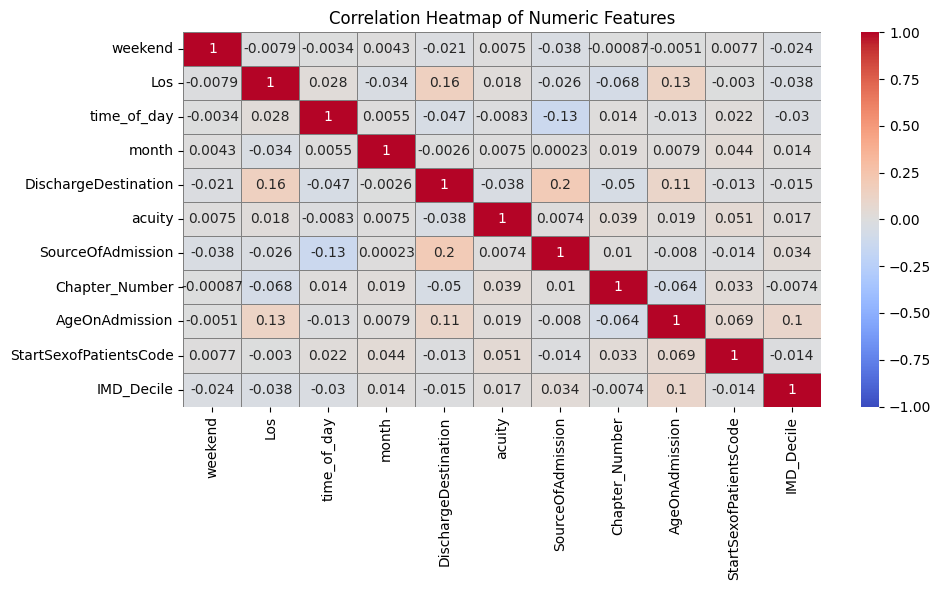

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric features
numeric_features = [
    'weekend', 'Los', 'time_of_day', 'month', 'DischargeDestination', 'acuity', 'SourceOfAdmission', 'Chapter_Number',
    'AgeOnAdmission', 'StartSexofPatientsCode', 'IMD_Decile'
]

# Compute correlation matrix
correlation_matrix = df_short_los[numeric_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    center=0,
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()


In [123]:
import pandas as pd

# Group by 'WardAdmission' and calculate the mean of 'Los'
mean_los = df_short_los.groupby('WardAdmission')['Los'].mean().reset_index(name='Mean_Los')

# Count the number of entries for each 'WardAdmission'
entry_counts = df_short_los['WardAdmission'].value_counts().reset_index()
entry_counts.columns = ['WardAdmission', 'Total_Entries']

# Merge the two DataFrames on 'WardAdmission'
summary_df = pd.merge(mean_los, entry_counts, on='WardAdmission')

# Display the resulting DataFrame
print(summary_df)


                   WardAdmission   Mean_Los  Total_Entries
0                 AMU-Barrington   8.882470           1004
1             Acute Medical Unit   9.453649           2535
2      Ambulatory Emergency Care   8.495050            101
3                Barrington Ward  14.690000            200
4                     Blake Ward  15.200000              5
5   Cardiac Catheter Laboratory    2.013889            216
6            Coleridge Resp Unit  17.000000              1
7             Conservators Ward   17.000000              1
8            Coronary Care Unit    5.220204           1762
9           Dunkery Stroke Neuro   8.000000              3
10                 Dunkery Ward   18.750000              4
11                  Exmoor Ward   20.333333              3
12                Fielding Ward   11.573333            150
13                   Gen Th PACU  13.000000              2
14              Hestercombe Ward  10.619048             21
15          High Dependency Unit  15.875000             

In [93]:
df_short_los.columns

Index(['admission_datetime', 'weekend', 'time_of_day', 'month', 'Los',
       'DischargeDestination', 'WardAdmission', 'acuity', 'AdmissionMethod',
       'SourceOfAdmission', 'EthnicCategory', 'AgeOnAdmission',
       'StartSexofPatientsCode', 'PrimaryDiagnosisICD', 'Description',
       'Chapter_Number', 'Chapter_Description', 'IMD_Decile'],
      dtype='object')

In [97]:
df_short_los =  df_short_los.drop(columns=['admission_datetime', 'DischargeDestination', 'EthnicCategory', 'Description', 'Chapter_Description'])

In [98]:
df_short_los.columns

Index(['weekend', 'time_of_day', 'month', 'Los', 'WardAdmission', 'acuity',
       'AdmissionMethod', 'SourceOfAdmission', 'AgeOnAdmission',
       'StartSexofPatientsCode', 'PrimaryDiagnosisICD', 'Chapter_Number',
       'IMD_Decile'],
      dtype='object')

Linear Regression Model:

In [101]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Define features and target
X = df_short_los.drop(columns='Los')
y = df_short_los['Los']


# column seperation
categorical_cols = ['weekend',  'time_of_day', 'month', 'WardAdmission', 'acuity', 'AdmissionMethod', 'SourceOfAdmission', 'StartSexofPatientsCode', 'Chapter_Number', 'IMD_Decile']
high_cardinality_cols = ['PrimaryDiagnosisICD']
numerical_cols = ['AgeOnAdmission']

# Target encoding ICD code
for col in high_cardinality_cols:
    X[col] = df_short_los.groupby(col)['Los'].transform('mean')

# One-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep numerical and target-encoded columns
)

# Model and preprocessing are warped in a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
pipeline.fit(X_train, y_train)

# Predict on training data
y_train_pred = pipeline.predict(X_train)

# Evaluate on training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Predict on testing data
y_test_pred = pipeline.predict(X_test)

# Evaluate on testing data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

# Output results
print("Linear Regression Model Performance:")
print("\nTraining Set:")
print(f"MAE: {train_mae:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"R² Score: {train_r2:.2f}")

print("\nTesting Set:")
print(f"MAE: {test_mae:.2f}")
print(f"RMSE: {test_rmse:.2f}")
print(f"R² Score: {test_r2:.2f}")



Linear Regression Model Performance:

Training Set:
MAE: 4.46
RMSE: 7.18
R² Score: 0.43

Testing Set:
MAE: 4.72
RMSE: 7.38
R² Score: 0.42


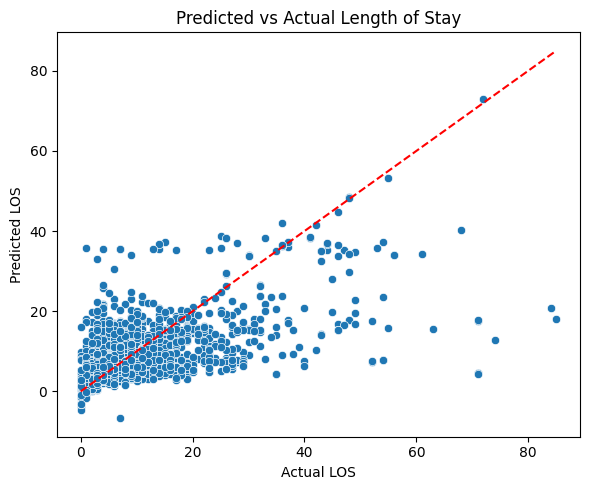

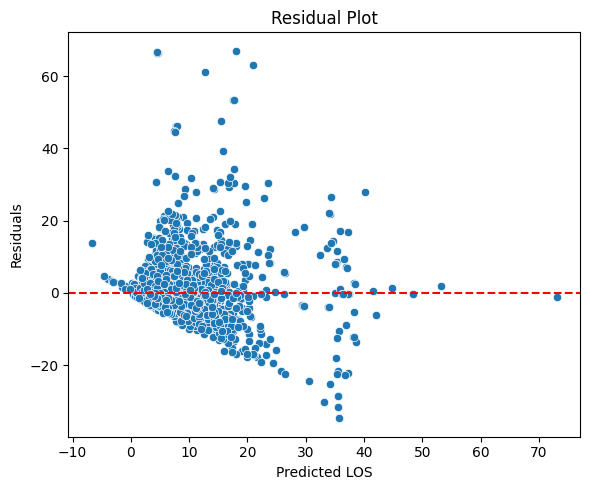

In [422]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_test_pred

# Predicted vs Actual
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel("Actual LOS")
plt.ylabel("Predicted LOS")
plt.title("Predicted vs Actual Length of Stay")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.tight_layout()
plt.show()

# Residual Plot
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted LOS")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.tight_layout()
plt.show()


XGBoosting Regression:

In [103]:
# Import necessary libraries
import optuna
import numpy as np

from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

#column distribution
numerical_cols = ['AgeOnAdmission']
low_card_cols = ['weekend',  'time_of_day', 'month', 'WardAdmission', 'acuity', 'AdmissionMethod', 'SourceOfAdmission', 'StartSexofPatientsCode', 'Chapter_Number', 'IMD_Decile']
target_enc_cols = ['PrimaryDiagnosisICD']

# Define preprocessing pipelines for each feature group
num_pipe = Pipeline([
    ('scaler', StandardScaler())  # Scale numerical features
])

low_card_pipe = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode low-cardinality categorical features
])


target_enc_pipe = Pipeline([
    ('target_enc', TargetEncoder())  # Target encode high-cardinality categorical features
])


# Combine preprocessing steps
preprocessor = ColumnTransformer([
    ('num', num_pipe, numerical_cols),
    ('low_ohe', low_card_pipe, low_card_cols),
    ('target_enc', target_enc_pipe, target_enc_cols)
])

# Split data into training and test sets
target_col = 'Los'
X = df_short_los.drop(columns=[target_col])
y = df_short_los[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


In [107]:
# Define Optuna objective function for hyperparameter tuning
def objective(trial):

    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 1500),
        'max_depth': trial.suggest_int('max_depth', 2, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0, log=True),
        'random_state': 50,
        'n_jobs': -1,
        'eval_metric': 'rmse'
    }

    xgb = XGBRegressor(**params)

    # Create pipeline with preprocessing and model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', xgb)
    ])

    # to normalize distribution as target varibale is right skewed
    regressor = TransformedTargetRegressor(
        regressor=pipeline,
        func=np.log1p,
        inverse_func=np.expm1
    )

    # 5-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=50)
    scores = cross_validate(regressor, X_train, y_train, cv=kf, scoring=['neg_mean_squared_error'], return_train_score=False)

    # mean MSE
    mean_mse = -np.mean(scores['test_neg_mean_squared_error'])

    return mean_mse

# Optuna study to find best hyperparameters
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Best trial params:", study.best_trial.params)

[I 2025-08-20 13:12:04,141] A new study created in memory with name: no-name-5b661803-0cd2-4552-ac42-d71990dffeef
[I 2025-08-20 13:12:12,139] Trial 0 finished with value: 75.0991111755371 and parameters: {'n_estimators': 798, 'max_depth': 10, 'learning_rate': 0.1200477175547265, 'subsample': 0.9535266190750631, 'colsample_bytree': 0.8330460271595996, 'reg_alpha': 0.19031474945275986, 'reg_lambda': 0.2770618675587125}. Best is trial 0 with value: 75.0991111755371.
[I 2025-08-20 13:12:22,180] Trial 1 finished with value: 72.8804084777832 and parameters: {'n_estimators': 986, 'max_depth': 16, 'learning_rate': 0.09459447160602331, 'subsample': 0.6602095034206843, 'colsample_bytree': 0.9432387071167553, 'reg_alpha': 3.7277019215507328, 'reg_lambda': 0.01406367617703328}. Best is trial 1 with value: 72.8804084777832.
[I 2025-08-20 13:12:27,325] Trial 2 finished with value: 73.49934997558594 and parameters: {'n_estimators': 701, 'max_depth': 8, 'learning_rate': 0.04057038648949592, 'subsample

Best trial params: {'n_estimators': 1322, 'max_depth': 3, 'learning_rate': 0.015169943776795241, 'subsample': 0.5293148600336043, 'colsample_bytree': 0.5245037568035386, 'reg_alpha': 0.40846313229184666, 'reg_lambda': 3.938511361463802}


In [108]:
# Train final model using best hyperparameters
best_params = study.best_trial.params
final_model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(**best_params))
])

# Apply log transformation to target during training
regressor = TransformedTargetRegressor(
    regressor=final_model,
    func=np.log1p,
    inverse_func=np.expm1
)

# Fit model and make predictions
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)


In [109]:
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f"Final Train MAE: {mae_train:.3f}, RMSE: {rmse_train:.3f}, R² Score: {r2_train:.4f}")

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Final Test MAE: {mae:.3f}, RMSE: {rmse:.3f}, R² Score: {r2:.4f}")

Final Train MAE: 4.132, RMSE: 7.471, R² Score: 0.3804
Final Test MAE: 4.975, RMSE: 8.600, R² Score: 0.2102


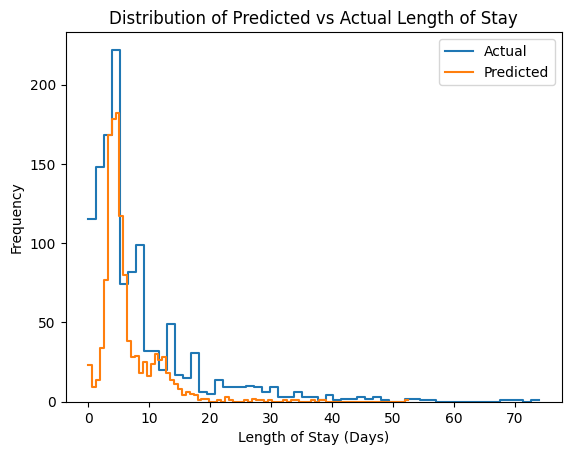

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot actual values
sns.histplot(y_test, bins='auto', fill=False, element="step", label='Actual')

# Plot predicted values
sns.histplot(y_pred, bins='auto', fill=False, element="step", label='Predicted')


# Add axis labels and legend
plt.xlabel('Length of Stay (Days)')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted vs Actual Length of Stay')
plt.legend()

# Show the plot
plt.show()


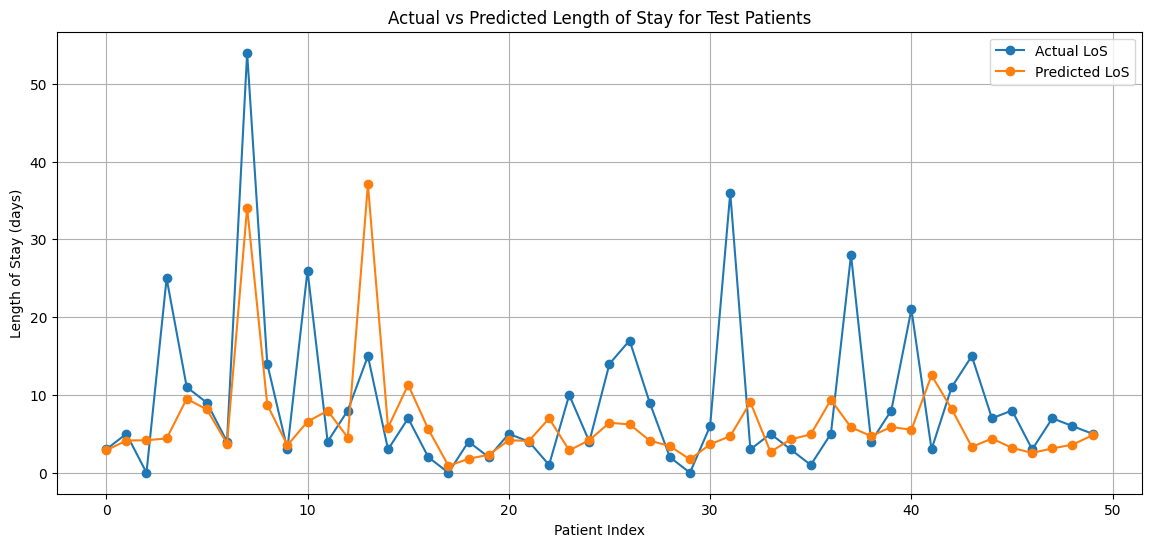

In [115]:

import matplotlib.pyplot as plt
import numpy as np

# Convert to numpy arrays for indexing
y_test_array = np.array(y_test[:50])
y_pred_array = np.array(y_pred[:50])

# Create an index for each patient
indices = np.arange(len(y_test_array))

# Plot actual vs predicted as line plot
plt.figure(figsize=(14, 6))
plt.plot(indices, y_test_array, label='Actual LoS', marker='o')
plt.plot(indices, y_pred_array, label='Predicted LoS', marker='o')
plt.xlabel('Patient Index')
plt.ylabel('Length of Stay (days)')
plt.title('Actual vs Predicted Length of Stay for Test Patients')
plt.legend()
plt.grid(True)


In [110]:
import optuna.visualization as vis

vis.plot_optimization_history(study).show()
vis.plot_param_importances(study).show()


C:\Users\jawad.iqbal\AppData\Local\Temp\ipykernel_10096\1464632316.py:21: FutureWarning:

The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.



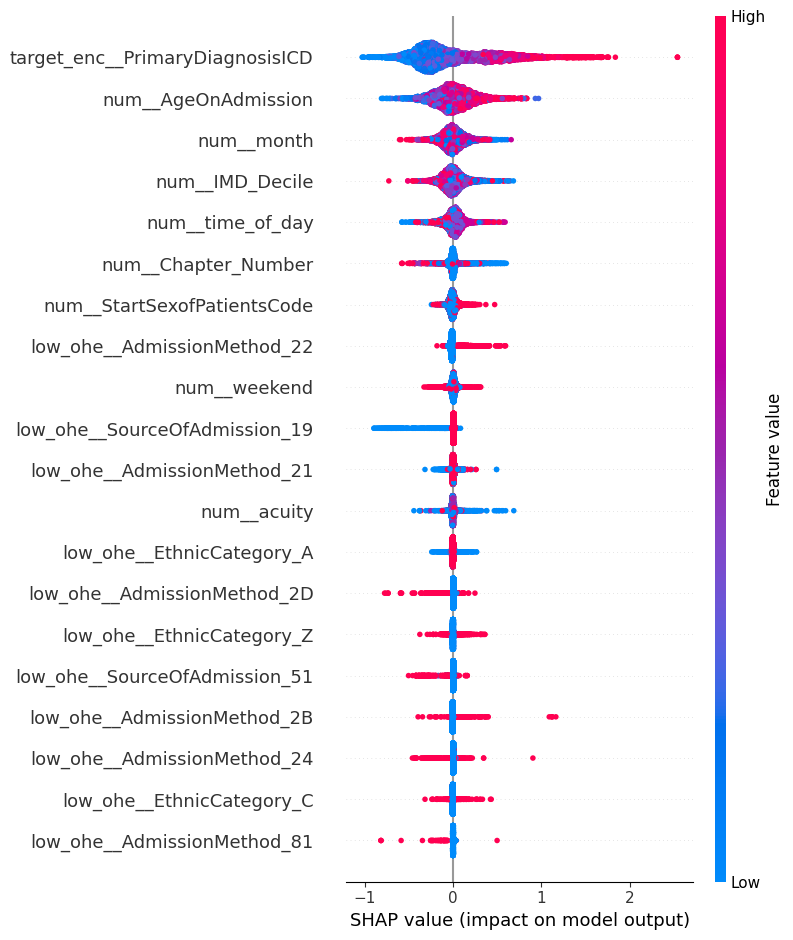

In [377]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Extract model from your pipeline
trained_xgb_model = final_model.named_steps['model']

# Transform the training data using the fitted preprocessor
X_train_transformed = preprocessor.transform(X_train)

# Fit the XGBoost model directly on the transformed data with log-transformed target
trained_xgb_model.fit(X_train_transformed, np.log1p(y_train))

# Create SHAP explainer
explainer = shap.Explainer(trained_xgb_model)

# Compute SHAP values
shap_values = explainer(X_train_transformed)

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_train_transformed, feature_names=preprocessor.get_feature_names_out())


In [113]:
import pandas as pd
import sqlalchemy as sa

engine = sa.create_engine("mssql+pyodbc:///?odbc_connect= DRIVER={SQL Server};SERVER=mph-eprprddwh1\DWHPRD;Trusted_Connection=yes;")

with engine.connect() as conn:
   test_df = pd.read_sql(open("S:\Data Science\sandboxes\Jawad\patient_LOS_project\SQL_query\emergency_sql_queries\emerg_test_Los.sql").read(), con=conn.connection)

<>:4: SyntaxWarning:

invalid escape sequence '\D'

<>:7: SyntaxWarning:

invalid escape sequence '\D'

<>:4: SyntaxWarning:

invalid escape sequence '\D'

<>:7: SyntaxWarning:

invalid escape sequence '\D'

C:\Users\jawad.iqbal\AppData\Local\Temp\ipykernel_21760\1618492868.py:4: SyntaxWarning:

invalid escape sequence '\D'

C:\Users\jawad.iqbal\AppData\Local\Temp\ipykernel_21760\1618492868.py:7: SyntaxWarning:

invalid escape sequence '\D'

C:\Users\jawad.iqbal\AppData\Local\Temp\ipykernel_21760\1618492868.py:7: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\jawad.iqbal\AppData\Local\Temp\ipykernel_21760\1618492868.py:4: SyntaxWarning:

invalid escape sequence '\D'

C:\Users\jawad.iqbal\AppData\Local\Temp\ipykernel_21760\1618492868.py:7: SyntaxWarning:

invalid escape sequence '\D'



KeyboardInterrupt: 

In [243]:
test_df=test_df.drop_duplicates()

In [244]:
test_df = test_df.dropna()

In [245]:
len(test_df)

489

In [311]:
test_df.head(5)

,weekend,time_of_day,month,Los,WardAdmission,acuity,AdmissionMethod,SourceOfAdmission,AgeOnAdmission,StartSexofPatientsCode,PrimaryDiagnosisICD,Chapter_Number,IMD_Decile
0,0,4,1,5,AMU-Barrington,1.0,21,19,56,1,I214,9,8.0
1,0,2,6,4,AMU-Barrington,3.0,21,19,75,1,I251,9,2.0
2,0,2,6,4,AMU-Barrington,2.0,21,19,75,1,I251,9,2.0
3,1,2,1,2,Coronary Care Unit,4.0,21,19,75,1,I214,9,5.0
4,0,2,1,0,Coronary Care Unit,2.0,21,19,78,1,I251,9,5.0


In [352]:
test_df_20 = test_df[test_df['Los']<=20]

In [353]:
batch_predictions = regressor.predict(test_df_20)

In [354]:
t_r2 = r2_score(test_df_20['Los'], batch_predictions)
t_mae = mean_absolute_error(test_df_20['Los'], batch_predictions)
t_rmse = np.sqrt(mean_squared_error(test_df_20['Los'], batch_predictions))

print(f"Unseen Test MAE: {t_mae:.3f}, RMSE: {t_rmse:.3f}, R² Score: {t_r2:.4f}")

Unseen Test MAE: 3.175, RMSE: 4.421, R² Score: 0.0505


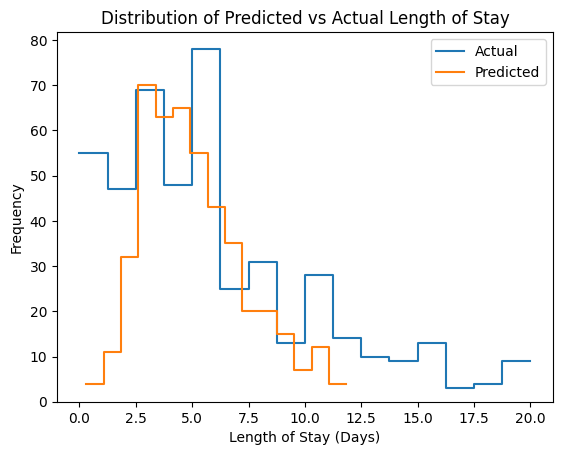

In [355]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot actual values
sns.histplot(test_df_20['Los'], bins='auto', fill=False, element="step", label='Actual')

# Plot predicted values
sns.histplot(batch_predictions, bins='auto', fill=False, element="step", label='Predicted')


# Add axis labels and legend
plt.xlabel('Length of Stay (Days)')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted vs Actual Length of Stay')
plt.legend()

# Show the plot
plt.show()


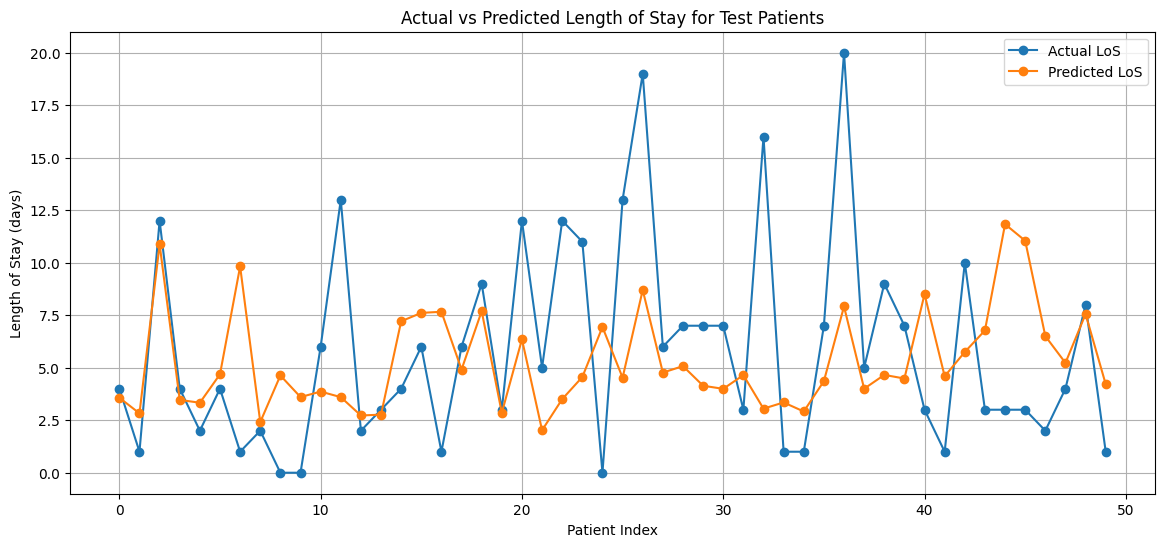

In [356]:

import matplotlib.pyplot as plt
import numpy as np

# Convert to numpy arrays for indexing
y_test_array = np.array(test_df_20['Los'][50:100])
y_pred_array = np.array(batch_predictions[50:100])

# Create an index for each patient
indices = np.arange(len(y_test_array))

# Plot actual vs predicted as line plot
plt.figure(figsize=(14, 6))
plt.plot(indices, y_test_array, label='Actual LoS', marker='o')
plt.plot(indices, y_pred_array, label='Predicted LoS', marker='o')
plt.xlabel('Patient Index')
plt.ylabel('Length of Stay (days)')
plt.title('Actual vs Predicted Length of Stay for Test Patients')
plt.legend()
plt.grid(True)


In [252]:
test_df[24:27]

,weekend,time_of_day,month,Los,WardAdmission,acuity,AdmissionMethod,SourceOfAdmission,AgeOnAdmission,StartSexofPatientsCode,PrimaryDiagnosisICD,Chapter_Number,IMD_Decile
24,1,2,1,8,AMU-Barrington,3.0,21,19,76,2,J440,10,1.0
25,0,4,1,55,AMU-Barrington,2.0,21,19,70,1,T826,19,5.0
26,0,2,1,20,Montacute Ward,3.0,21,19,40,1,J150,10,7.0


In [83]:
len(df_short_los[df_short_los['PrimaryDiagnosisICD'].str.strip().str.upper() == 'I214'])


1761

RandomForestRegresssion

In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint


# Define features and target
X = df_short_los.drop(columns='Los')
y = df_short_los['Los']

# Categorical and numerical features
numerical_cols = ['AgeOnAdmission']

categorical_cols = ['weekend',  'time_of_day', 'month', 'WardAdmission', 'acuity', 'AdmissionMethod', 'SourceOfAdmission', 'StartSexofPatientsCode', 'PrimaryDiagnosisICD', 'Chapter_Number', 'IMD_Decile']


# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)],
    remainder='passthrough'  # Keep numerical columns as is
)

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Hyperparameter grid
param_dist = {
    'regressor__n_estimators': randint(100, 500),
    'regressor__max_depth': randint(5, 30),
    'regressor__min_samples_split': randint(2, 10),
    'regressor__min_samples_leaf': randint(1, 10),
    'regressor__max_features': ['auto', 'sqrt', 'log2']
}

# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', rf)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Randomized Search CV
search = RandomizedSearchCV(pipeline, param_distributions=param_dist,
                            n_iter=20, cv=5, scoring='neg_mean_squared_error',
                            verbose=1, random_state=42, n_jobs=-1)

# Fit the model
search.fit(X_train, y_train)

# Best model
best_model = search.best_estimator_

print("Best Parameters:", search.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: 

In [ ]:

# Predict and evaluate
y_test_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

mae_2 = mean_absolute_error(y_test, y_pred)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred))
r2_2= r2_score(y_test, y_pred)
